# Homework 5

**Before you start:** Read Chapter on Naive Bayes and KNN in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

# Part 1: K-Nearst-Neighbors

### Problem 2 ##

The objective is to classify the breast cancer data using K-NN classifier.

**TODO1**

Load the breast cancer data and rename the columns to the below fields in the same order

Id, C_thickness, Cell_Size, Cell_Shape, Adhesion, E_Cell_Size, Bare_Nuclei, B_Chromatin, N_Nucleoli, Mitoses, Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("breast-cancer-wisconsin.txt", sep=",") 
df.head()

Saving breast-cancer-wisconsin.txt to breast-cancer-wisconsin.txt


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df2 = df.set_axis(['Id', 'C_thickness', 'Cell_Size', 'Cell_Shape', 'Adhesion', 'E_Cell_Size', 'Bare_Nuclei', 'B_Chromatin', 'N_Nucleoli', 'Mitoses', 'Class'], axis=1, inplace=False)

In [4]:
df2.head()

,Id,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**TODO 2**

Plot the heatmap for the correlation coefficients with the target variable (Class)  and interpret your findings.


Drop redundant columns and view summary of the dataset.
Convert all the variables to numeric.


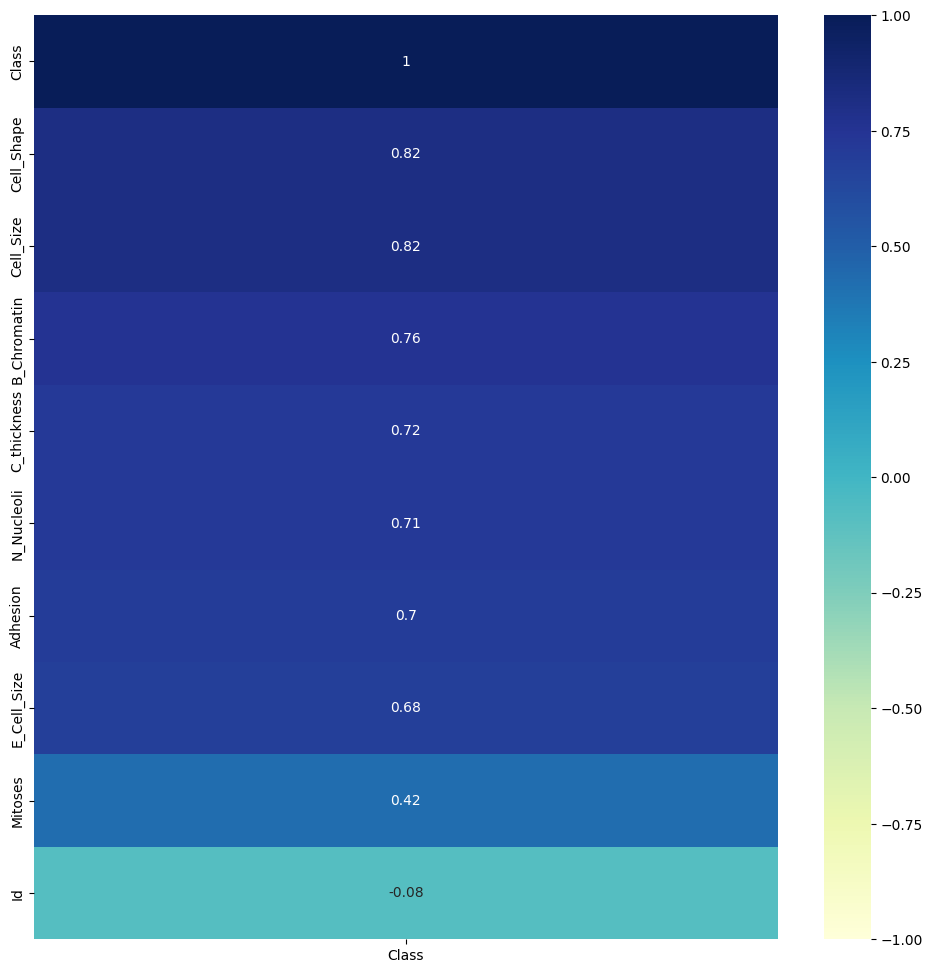

In [5]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(df2.corr()[['Class']].sort_values('Class').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

**Dropping ID as its not correlated to the class and dropping cell shape as it has higher collinearity with cell size (both correlated with pearson coefficient of 0.91.**

In [6]:
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df2.drop(to_drop, axis=1, inplace=True)

In [7]:
df2.drop("Id", axis=1, inplace=True)

In [8]:
df2.head()

,C_thickness,Cell_Size,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,2
1,5,4,5,7,10,3,2,1,2
2,3,1,1,2,2,3,1,1,2
3,6,8,1,3,4,3,7,1,2
4,4,1,3,2,1,3,1,1,2


In [9]:
problem_cols = ['C_thickness', 'Cell_Size', 'Adhesion', 'E_Cell_Size', 'Bare_Nuclei', 'B_Chromatin', 'N_Nucleoli', 'Mitoses', 'Class']
df2[problem_cols] = df2[problem_cols].apply(pd.to_numeric, downcast='integer',errors='coerce')
print(df2.dtypes)

C_thickness       int8
Cell_Size         int8
Adhesion          int8
E_Cell_Size       int8
Bare_Nuclei    float64
B_Chromatin       int8
N_Nucleoli        int8
Mitoses           int8
Class             int8
dtype: object


In [10]:
df2.describe()

,C_thickness,Cell_Size,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**TODO 3**



Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set.

Impute the missing values with the mean values of training data.
Check if all the nulls are removed in both train and test dataset.

Standardize the data.

**Note:**   When you standardize the validation set, you need to use the training set's mean and variance. 


**it is a good idea to rescale the data before building a k-NN model, as the algorithm is based on the distances between data points. If the features are not on the same scale, those with larger values will dominate the distance calculations, leading to biased results.**

In [11]:
X = df2.values[:,0:-1]
y = df2.values[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [13]:
count_na_percent =(df2.isna().sum()/len(df2))*100
count_na_percent

C_thickness    0.000000
Cell_Size      0.000000
Adhesion       0.000000
E_Cell_Size    0.000000
Bare_Nuclei    2.288984
B_Chromatin    0.000000
N_Nucleoli     0.000000
Mitoses        0.000000
Class          0.000000
dtype: float64

In [14]:
feature_means = np.nanmean(X_train, axis=0)

In [15]:
means= feature_means[6]
means

2.9236641221374047

In [16]:
df3= df2.fillna(means).round(2)

In [17]:
count_na_percent =df3.isna().sum()
count_na_percent

C_thickness    0
Cell_Size      0
Adhesion       0
E_Cell_Size    0
Bare_Nuclei    0
B_Chromatin    0
N_Nucleoli     0
Mitoses        0
Class          0
dtype: int64

In [18]:
X = df3.values[:,0:-1]
y = df3.values[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [21]:
X_train_scale=((X_train-np.mean(X_train, axis = 0))/np.std(X_train , axis = 0))
X_test_scale=((X_test-np.mean(X_train, axis = 0))/np.std(X_train , axis = 0)) #using X train mean and variance to scale X_test

**TODO 4**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scale, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
y_pred_class = knn.predict(X_test_scale)

# compute classification accuracy

print(metrics.accuracy_score(y_test, y_pred_class))

0.96


In [26]:
k_range = range(1, 11)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain accuracy for KNeighborsClassifier with k neighbours
    knn.fit(X_train_scale, y_train)
    y_pred_class = knn.predict(X_test_scale)
    scores= metrics.accuracy_score(y_test, y_pred_class)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9428571428571428, 0.9771428571428571, 0.9657142857142857, 0.9657142857142857, 0.9657142857142857, 0.9657142857142857, 0.96, 0.9657142857142857, 0.9657142857142857]


In [27]:
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 0.96,
 2: 0.9428571428571428,
 3: 0.9771428571428571,
 4: 0.9657142857142857,
 5: 0.9657142857142857,
 6: 0.9657142857142857,
 7: 0.9657142857142857,
 8: 0.96,
 9: 0.9657142857142857,
 10: 0.9657142857142857}

Text(0, 0.5, 'Classification Accuracy')

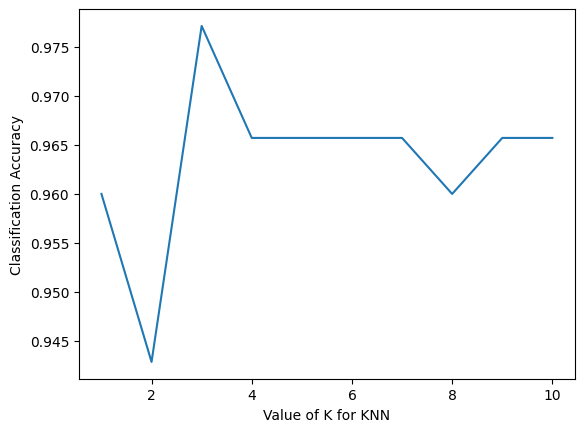

In [28]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Classification Accuracy')

**Choosing k=5, as the difference in accuracy between k=4 and k=7 is insignificant, while odd value of k=5 will be more accurate for predictive performance.**

**TODO 5**

For the chosen k, display the confusion matrix and evaluate the performance of the model using recall and precision.

Check for overfitting and underfitting for the k chosen.

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

y_pred_class = knn.predict(X_test_scale)

In [32]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         2.0       0.98      0.96      0.97       112
         4.0       0.94      0.97      0.95        63

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



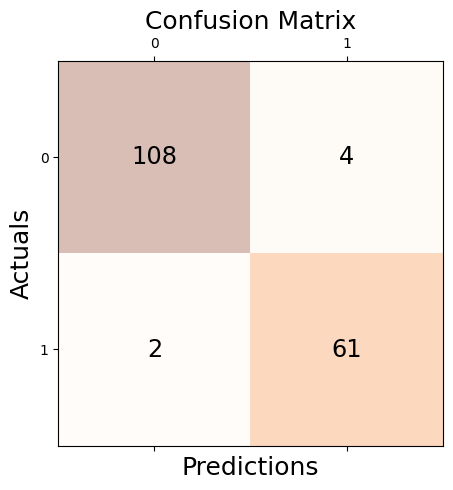

In [33]:
conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [36]:
y_pred_train = knn.predict(X_train_scale)
y_pred_test = knn.predict(X_test_scale)

In [43]:
scores_test= cross_val_score(knn, X_test_scale, y_test, cv=5, scoring='accuracy')

In [44]:
scores_test

array([0.94285714, 0.97142857, 0.97142857, 1.        , 0.94285714])

In [45]:
scores_train= cross_val_score(knn, X_train_scale, y_train, cv=5, scoring='accuracy')

In [46]:
scores_train

array([0.91428571, 0.96190476, 0.96190476, 0.96190476, 0.98076923])

**Using Cross Validation technique, training and testing accuracy is not significantly changed. Therefore, there is no underfitting or Overfitting**

**TODO 6**

Classify the new record given below using the chosen k. 

1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1

Considering the size of the dataset, would you recommend data partition before scoring the new record? Why?

In [47]:
X_test_data= [[5, 4, 5, 7, 10, 3, 2, 1]]

In [48]:
y_predict = knn.predict(X_test_data)

In [49]:
y_predict

array([4.])

Classify the new record given below using the chosen k.

**5, 4, 4, 5, 7, 10, 3, 2, 1- This one belongs to Class 4**

### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN regression to predict the mpg with the given attributes.

In [50]:
# import the dataset "auto_mpg.csv"


In [51]:
file = files.upload()  #upload file into google colab session
df1 = pd.read_csv("auto_mpg.csv") 
df1.head()

Saving auto_mpg.csv to auto_mpg.csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

**Car Name has entirely unique values/levels, so it would not be useful for prediction purposes because the variable has randomness/error associated with it**

In [52]:
import numpy as N
list_inp = df1['car name'] 
res = N.array(list_inp) 
unique_res = N.unique(res)
print("Unique elements of the list using numpy.unique():\n")
print(unique_res)

Unique elements of the list using numpy.unique():

['amc ambassador brougham' 'amc ambassador dpl' 'amc ambassador sst'
 'amc concord' 'amc concord d/l' 'amc concord dl 6' 'amc gremlin'
 'amc hornet' 'amc hornet sportabout (sw)' 'amc matador'
 'amc matador (sw)' 'amc pacer' 'amc pacer d/l' 'amc rebel sst'
 'amc spirit dl' 'audi 100 ls' 'audi 100ls' 'audi 4000' 'audi 5000'
 'audi 5000s (diesel)' 'audi fox' 'bmw 2002' 'bmw 320i' 'buick century'
 'buick century 350' 'buick century limited' 'buick century luxus (sw)'
 'buick century special' 'buick electra 225 custom'
 'buick estate wagon (sw)' 'buick lesabre custom'
 'buick opel isuzu deluxe' 'buick regal sport coupe (turbo)'
 'buick skyhawk' 'buick skylark' 'buick skylark 320'
 'buick skylark limited' 'cadillac eldorado' 'cadillac seville' 'capri ii'
 'chevroelt chevelle malibu' 'chevrolet bel air' 'chevrolet camaro'
 'chevrolet caprice classic' 'chevrolet cavalier'
 'chevrolet cavalier 2-door' 'chevrolet cavalier wagon'
 'chevrolet chev

In [53]:
df2= df1.drop("car name", axis='columns')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [54]:
cat_var= ['origin']
df3 = pd.get_dummies(df2, columns=cat_var)
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [55]:
problem_cols = ['mpg','cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year']
df3[problem_cols] = df3[problem_cols].apply(pd.to_numeric, errors='coerce')
print(df3.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin_1          uint8
origin_2          uint8
origin_3          uint8
dtype: object


**TODO 3**

Partition the data into 75% training and 25% validation set.

In [56]:
count_na_percent =(df3.isna().sum()/len(df3))*100
count_na_percent

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.254453
weight          0.000000
acceleration    0.000000
model year      0.000000
origin_1        0.000000
origin_2        0.000000
origin_3        0.000000
dtype: float64

In [57]:
means = df3.mean()

In [58]:
for col in df3.columns:
    if df3[col].isnull().sum() > 0: 
        df3[col].fillna(value=means[col], inplace=True) 

In [59]:
count_na_percent =(df3.isna().sum()/len(df3))*100
count_na_percent

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin_1        0.0
origin_2        0.0
origin_3        0.0
dtype: float64

In [60]:
X = df3.values[:,1:]
y = df3.values[:,0]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

**TODO 4**

Rescale the numeric data. Note that dummy variables should not be rescaled.

**Note:** When you standardize the validation set, you need to use the training set's mean and variance.

In [62]:
scaler = StandardScaler(with_mean=True, with_std=True)
df3.iloc[:,1:7]= scaler.fit_transform(df3.iloc[:,1:7])

In [63]:
X = df3.values[:,1:]
y = df3.values[:,0]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [66]:
knn1 = KNeighborsRegressor(n_neighbors=1)

knn1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [67]:
k_range = range(1, 11)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegressor with k neighbours
    knn1 = KNeighborsRegressor(n_neighbors=k)
    knn1.fit(X_train, y_train)  #fit the model
    pred=knn1.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate mse
    k_scores.append(error) #store mse values
    print('MSE value for k= ' , k , 'is:', error)
print(k_scores)

MSE value for k=  1 is: 12.902626262626264
MSE value for k=  2 is: 10.062601010101012
MSE value for k=  3 is: 8.70599326599327
MSE value for k=  4 is: 8.47787878787879
MSE value for k=  5 is: 9.2343797979798
MSE value for k=  6 is: 9.143086419753088
MSE value for k=  7 is: 10.027955060812205
MSE value for k=  8 is: 10.313219696969698
MSE value for k=  9 is: 10.295311136051877
MSE value for k=  10 is: 10.257546464646467
[12.902626262626264, 10.062601010101012, 8.70599326599327, 8.47787878787879, 9.2343797979798, 9.143086419753088, 10.027955060812205, 10.313219696969698, 10.295311136051877, 10.257546464646467]


In [68]:
k_dict=dict(zip(k_range,k_scores))
k_dict

{1: 12.902626262626264,
 2: 10.062601010101012,
 3: 8.70599326599327,
 4: 8.47787878787879,
 5: 9.2343797979798,
 6: 9.143086419753088,
 7: 10.027955060812205,
 8: 10.313219696969698,
 9: 10.295311136051877,
 10: 10.257546464646467}

Text(0, 0.5, 'MSE')

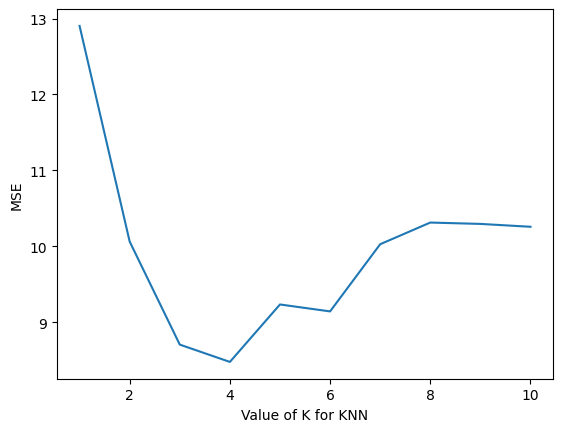

In [69]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('MSE')

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [70]:
knn1 = KNeighborsRegressor(n_neighbors=4)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.1484848484848484
Mean Squared Error: 8.47787878787879
Root Mean Squared Error: 2.911679719316462
R2 Score: 0.8627348509537958


**Since MSE is low for K=4 and between K=3 and 5, no significant change in values (eventhough graph shows dramatic increase)**

**This is a good model with R Square value of 0.86 andRMSE of 2.91**

# Naive Bayes

### **Problem 4**##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [72]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [73]:
# Import the dataset
import pandas as pd
from google.colab import files
file = files.upload()
df = pd.read_csv("IMDB Dataset_subset.csv")
df.head()

Saving IMDB Dataset_subset.csv to IMDB Dataset_subset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [74]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [75]:
X = [row for row in df['review']] #list of reviews
classes = df['sentiment'] #list of true classes

In [76]:
# Pre-process the data
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    # part 1
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    # part 2
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.

Part 1

Removing special characters and punctuations from the text data using regular expressions.

Lowercasing the text to ensure consistency and ease of processing.

Removing digits from the text since they usually do not convey much meaning in most NLP tasks.

Part 2

First it splits a string into a list

Then the function converts all the words in the string to its semantic words.

Next function joins the words from above and returns sentence.

In [77]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

Texts represents the vector representation of all the unique words used in the reviews

Vocab consists of all the unique words used in the reviews

Columns in the text array represent unique words in the vocab

**TODO 3**

Partition the data into 80% training and 20% validation set.

In [78]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True)
X_train = vectorizer.transform(train_df.review)
X_test = vectorizer.transform(test_df.review)

In [79]:
count_vect = CountVectorizer(binary=False).fit(df.review)

In [80]:
count_X_train = count_vect.transform(train_df.review)
count_X_test = count_vect.transform(test_df.review)

**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
clf = MultinomialNB().fit(count_X_train, train_df.sentiment)

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

In [83]:
count_X_test = count_vect.transform(test_df.review)
predicts = clf.predict(count_X_test)
print(classification_report(test_df.sentiment, predicts))

              precision    recall  f1-score   support

    negative       0.77      0.86      0.81       399
    positive       0.84      0.74      0.79       401

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



**Model is giving an accuracy of 80% and for negative reviews F1 score is 81% while for positive its 79%**

**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**If you are interested (this part is not graded):**

Explore one or two records that were misclassified. Check the original text, vectorized text, and comment on the possible reason why the record got misclassified.